In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf


In [ ]:
start='2010-01-01'
end='2024-06-30'
df=yf.download('TSLA',start,end)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-24,184.970001,188.800003,182.550003,182.580002,182.580002,61992100
2024-06-25,184.399994,187.970001,182.009995,187.350006,187.350006,63678300
2024-06-26,186.539993,197.759995,186.360001,196.369995,196.369995,95737100
2024-06-27,195.169998,198.720001,194.050003,197.419998,197.419998,72746500
2024-06-28,199.550003,203.199997,195.259995,197.880005,197.880005,95438100


In [ ]:
df=df.reset_index()
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


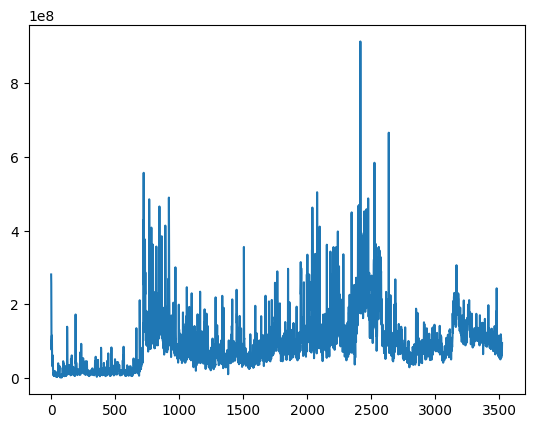

In [ ]:
plt.plot(df.Volume)

In [ ]:
df


,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
3519,184.970001,188.800003,182.550003,182.580002,61992100
3520,184.399994,187.970001,182.009995,187.350006,63678300
3521,186.539993,197.759995,186.360001,196.369995,95737100
3522,195.169998,198.720001,194.050003,197.419998,72746500


In [ ]:
 ma100=df.Volume.rolling(100).mean()
 ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3519    92481923.0
3520    92086492.0
3521    92125430.0
3522    91747844.0
3523    91359281.0
Name: Volume, Length: 3524, dtype: float64

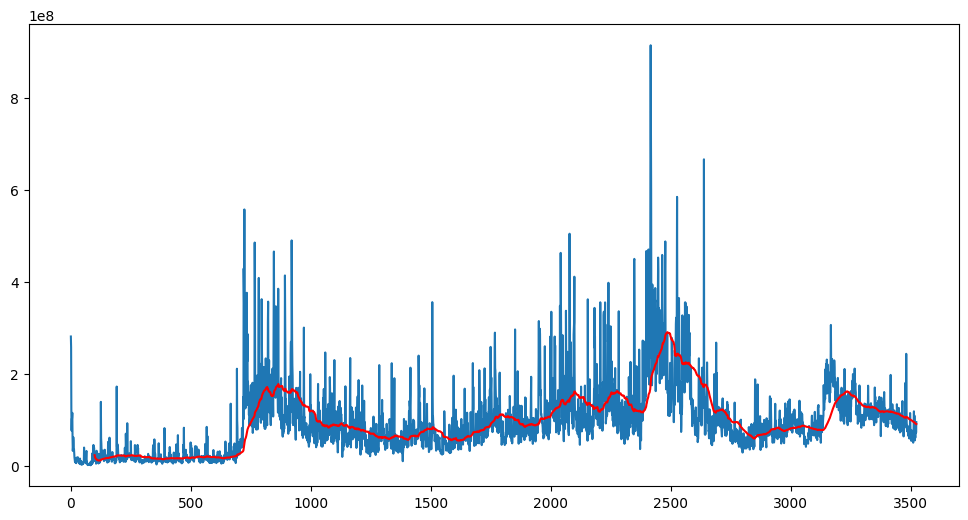

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Volume)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Volume.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3519    105426633.0
3520    105168460.0
3521    105055307.0
3522    104545700.0
3523    104342891.0
Name: Volume, Length: 3524, dtype: float64

In [ ]:
ma200[201]

20949322.5

In [ ]:
ma200[200]

22164600.0

In [ ]:
ma200[199]

23481210.0

In [ ]:
ma200[198]



nan

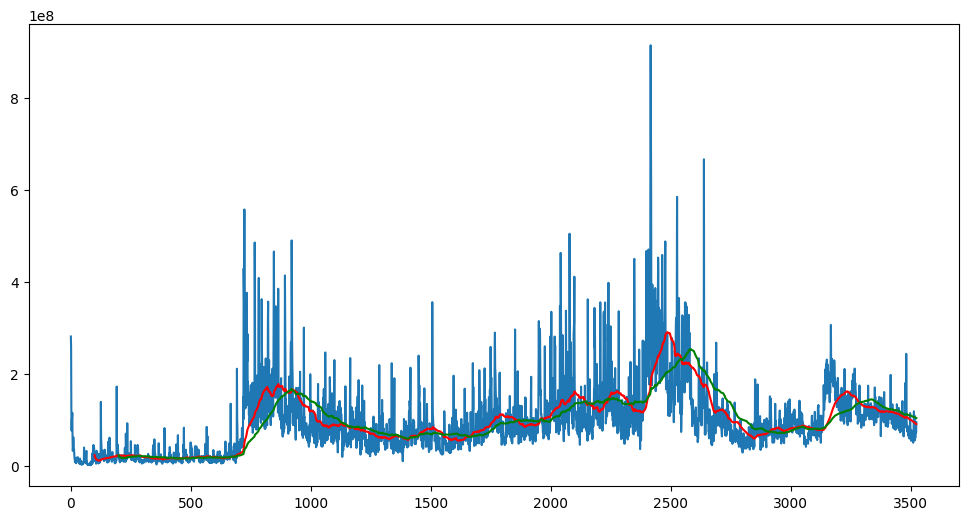

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Volume)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape


(3524, 5)

In [ ]:
data_training=pd.DataFrame(df['Volume'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Volume'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2466, 1)
(1058, 1)


In [ ]:
data_training.head()

,Volume
0,281494500
1,257806500
2,123282000
3,77097000
4,103003500


In [ ]:
data_testing.head()

,Volume
2466,309868500
2467,196923000
2468,221199000
2469,303136500
2470,212482500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.30660487],
       [0.28063985],
       [0.13318415],
       ...,
       [0.36758944],
       [0.50078674],
       [0.38570181]])

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2366, 100, 1)

In [ ]:
pip install tensorflow

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model=Sequential()


In [ ]:
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
74/74 [==============================] - 30s 310ms/step - loss: 0.0070
Epoch 2/100
74/74 [==============================] - 25s 340ms/step - loss: 0.0051
Epoch 3/100
74/74 [==============================] - 20s 274ms/step - loss: 0.0050
Epoch 4/100
74/74 [==============================] - 23s 315ms/step - loss: 0.0048
Epoch 5/100
74/74 [==============================] - 21s 284ms/step - loss: 0.0047
Epoch 6/100
74/74 [==============================] - 22s 293ms/step - loss: 0.0049
Epoch 7/100
74/74 [==============================] - 23s 317ms/step - loss: 0.0049
Epoch 8/100
74/74 [==============================] - 20s 271ms/step - loss: 0.0047
Epoch 9/100
74/74 [==============================] - 22s 298ms/step - loss: 0.0048
Epoch 10/100
74/74 [==============================] - 20s 274ms/step - loss: 0.0048
Epoch 11/100
74/74 [==============================] - 23s 318ms/step - loss: 0.0048
Epoch 12/100
74/74 [==============================] - 21s 283ms/step - loss: 0.0047
E

In [ ]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Volume
2466,309868500
2467,196923000
2468,221199000
2469,303136500
2470,212482500


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,Volume
0,100876500
1,91650000
2,253059000
3,185092500
4,119211000


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.08079157],
       [0.07036238],
       [0.25281135],
       ...,
       [0.07498224],
       [0.04899477],
       [0.07464426]])

In [ ]:
input_data.shape

(1158, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1058, 100, 1)
(1058,)


In [ ]:
y_predicted=model.predict(x_test)

34/34 [==============================] - 3s 80ms/step


In [ ]:
y_predicted.shape

(1058, 1)

In [ ]:
y_test

array([0.31702608, 0.18935792, 0.21679834, ..., 0.07498224, 0.04899477,
       0.07464426])

In [ ]:
y_predicted

array([[0.29626518],
       [0.26607713],
       [0.22550827],
       ...,
       [0.06732337],
       [0.06819501],
       [0.06857622]], dtype=float32)

In [ ]:
scaler.scale_

array([1.13035196e-09])

In [ ]:
scale_factor=1/0.00257704

In [ ]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


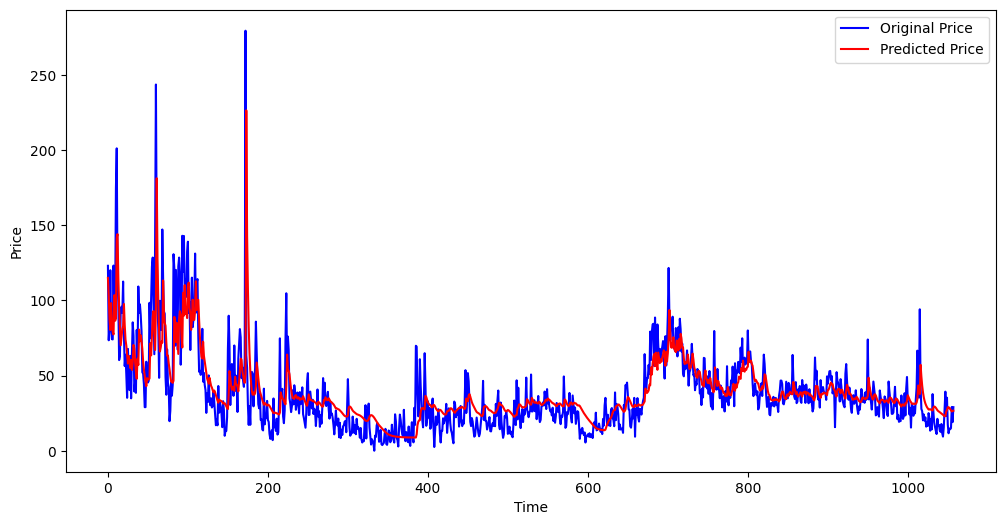

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

In [ ]:
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 337.5924679071408
Mean Absolute Error (MAE): 11.462368523402635


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_predicted)
accuracy = 100 - mape

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Accuracy: {accuracy:.2f}%')

Mean Absolute Percentage Error (MAPE): 93159643075079.22%
Accuracy: -93159643074979.22%
